# Pythonチャレンジ: 地震データを探る

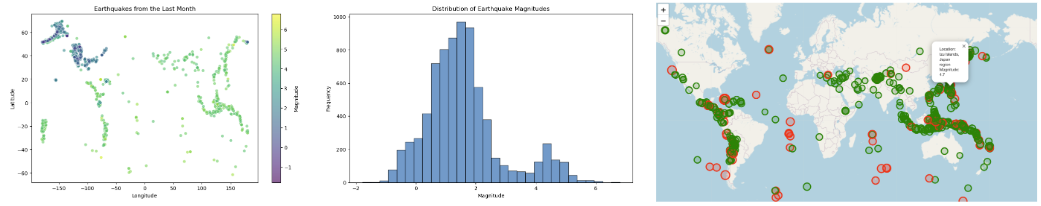

目的: Pythonを使ってUSGS（アメリカ地質調査所）のリアルタイム地震APIから最新の地震データを取得し、意味のある分析を行います。このチャレンジの最終目標は、世界中の地震を視覚化することです。

## 始めに

参考リンク：

- USGS 地震プログラム ホームページ: https://www.usgs.gov/programs/earthquake-hazards/earthquakes
- リアルタイムCSVデータ（スプレッドシート）API: https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php

データの取得: USGSのリアルタイム地震APIを使用して、最新の地震データを取得します。APIの基本URLは以下の通りです：

https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv

以下のPythonスクリプトを作成して：
- APIにリクエストを送信。
- csv形式のレスポンスを解析し、各地震の位置、マグニチュード、深さ、発生時刻などの情報を抽出します。

### リクエストコード例

In [2]:
! pip install pandas requests



   ---------------------------------------- 0/5 [urllib3]
   ---------------------------------------- 0/5 [urllib3]
   -------- ------------------------------- 1/5 [idna]
   ---------------- ----------------------- 2/5 [charset_normalizer]
   ---------------- ----------------------- 2/5 [charset_normalizer]
   -------------------------------- ------- 4/5 [requests]
   -------------------------------- ------- 4/5 [requests]
   ---------------------------------------- 5/5 [requests]




[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import requests

# USGSから過去1か月の地震データを取得
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
response = requests.get(url)

# データをファイルに保存
with open('earthquakes.csv', 'wb') as file:
    file.write(response.content)

# データをDataFrameに読み込む
data = pd.read_csv('earthquakes.csv')

# データの最初の5行を表示
data.head()

## チャレンジ

**チャレンジ1: データの取得と表示**

APIから地震データを取得し、以下を表示：
- 過去1ヶ月に報告された地震の総数
- 最大マグニチュードの地震とその発生場所と日にち
- 日本での地震の数

In [27]:
total_earthquakes = len(url)
print(f"過去1か月の地震の総数：{total_earthquakes}件")

import pandas as pd
from datetime import datetime

df = pd.read_csv(url) 

max_eq = df.loc[df["mag"].idxmax()]
max_mag = max_eq["mag"]
max_place = max_eq["place"]

# 日時の整形
max_time_dt = datetime.strptime(max_eq["time"], "%Y-%m-%dT%H:%M:%S.%fZ")
formatted_time = max_time_dt.strftime("%Y-%m-%d %H:%M:%S")

print(f"最大マグニチュード：{max_mag}")
print(f"場所：{max_place}")
print(f"日時：{formatted_time}")


過去1か月の地震の総数：71件
最大マグニチュード：6.8
場所：126 km E of Yamada, Japan
日時：2025-11-09 08:03:37


**チャレンジ2: 重要な地震のフィルタリング**

- マグニチュードが6.0を超える地震をフィルタリングし、`for` ループを使って以下をリストアップ：
    - その位置、マグニチュード、発生時刻
    - このような重要な地震の総数


In [28]:
# 重要地震を抽出
important_eq = df[df["mag"] > 6.0]

# 表示
print("⚠️ マグニチュード6.0以上の地震一覧")
print("-----------------------------------")

for _, row in important_eq.iterrows():
    place = row["place"]
    mag = row["mag"]
    time_dt = datetime.strptime(row["time"], "%Y-%m-%dT%H:%M:%S.%fZ")
    formatted_time = time_dt.strftime("%Y-%m-%d %H:%M:%S")
    print(f"場所：{place}／マグニチュード：{mag}／日時：{formatted_time}")

print("-----------------------------------")
print(f"マグニチュード6.0以上の地震の総数：{len(important_eq)}件")



⚠️ マグニチュード6.0以上の地震一覧
-----------------------------------
場所：121 km E of Yamada, Japan／マグニチュード：6.4／日時：2025-11-09 08:54:36
場所：126 km E of Yamada, Japan／マグニチュード：6.8／日時：2025-11-09 08:03:37
場所：155 km SE of Petropavlovsk-Kamchatsky, Russia／マグニチュード：6.1／日時：2025-11-03 08:44:43
場所：22 km WSW of Khulm, Afghanistan／マグニチュード：6.3／日時：2025-11-02 20:29:02
場所：Banda Sea／マグニチュード：6.4／日時：2025-10-28 14:40:18
場所：162 km E of Beauséjour, Guadeloupe／マグニチュード：6.5／日時：2025-10-27 12:38:40
場所：59 km NW of Pante Makasar, Timor Leste／マグニチュード：6.2／日時：2025-10-26 17:04:25
場所：194 km WNW of Abepura, Indonesia／マグニチュード：6.5／日時：2025-10-16 05:48:55
場所：Drake Passage／マグニチュード：6.3／日時：2025-10-16 01:42:32
-----------------------------------
マグニチュード6.0以上の地震の総数：9件


**チャレンジ3: 地震の深さを分析**

- すべての地震の平均深度を計算してください。
- 地震を以下のカテゴリに分類し、それぞれの数を数えてください：
    - 浅い地震 (<70 km)
    - 中間深度地震 (70–300 km)
    - 深い地震 (>300 km)


In [30]:
import pandas as pd

url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
df = pd.read_csv(url)

# 平均深度
average_depth = df["depth"].mean()
print(f"全地震の平均深度：{average_depth:.2f} km")

# 深さカテゴリ
shallow = df[df["depth"] < 70]
intermediate = df[(df["depth"] >= 70) & (df["depth"] <= 300)]
deep = df[df["depth"] > 300]

# 件数表示
print("\n地震の深さカテゴリ別件数")
print("---------------------------")
print(f"浅い地震 (<70 km)：{len(shallow)}件")
print(f"中間深度地震 (70–300 km)：{len(intermediate)}件")
print(f"深い地震 (>300 km)：{len(deep)}件")


全地震の平均深度：21.38 km

地震の深さカテゴリ別件数
---------------------------
浅い地震 (<70 km)：6742件
中間深度地震 (70–300 km)：493件
深い地震 (>300 km)：60件


**チャレンジ4: 時間分析**

- 地震のタイムスタンプ（ミリ秒単位のUNIX時間）を人間が読みやすい形式に変換して、日本時間として表示
- データセット内の最も早い地震と最新の地震の発生時刻を見つけてください。

In [33]:
import pandas as pd
from datetime import datetime, timedelta

url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
df = pd.read_csv(url)

# ISO形式の文字列を datetime に変換
df["time_dt"] = pd.to_datetime(df["time"], format="%Y-%m-%dT%H:%M:%S.%fZ")

# 日本時間（UTC+9）に変換
df["time_jst"] = df["time_dt"] + timedelta(hours=9)

# 確認（先頭5行）
print(df[["time", "time_jst"]].head())

# 最も早い地震
earliest = df.loc[df["time_dt"].idxmin()]
earliest_jst = earliest["time_jst"]

# 最新の地震
latest = df.loc[df["time_dt"].idxmax()]
latest_jst = latest["time_jst"]

print(f"最も早い地震：{earliest_jst.strftime('%Y-%m-%d %H:%M:%S')}（JST）")
print(f"最新の地震：{latest_jst.strftime('%Y-%m-%d %H:%M:%S')}（JST）")


                       time                time_jst
0  2025-11-12T03:56:40.876Z 2025-11-12 12:56:40.876
1  2025-11-12T03:51:19.635Z 2025-11-12 12:51:19.635
2  2025-11-12T03:40:46.667Z 2025-11-12 12:40:46.667
3  2025-11-12T03:38:25.280Z 2025-11-12 12:38:25.280
4  2025-11-12T03:31:54.350Z 2025-11-12 12:31:54.350
最も早い地震：2025-10-13 13:12:56（JST）
最新の地震：2025-11-12 12:56:40（JST）


**チャレンジ5: 地震のマグニチュードを視覚化**

- 以下をプロットする棒グラフまたは散布図を作成してください：
    - x軸に地震のマグニチュード。
    - y軸に深さ。
    - 最大の地震と最も深い地震にラベルを追加。

C:\Users\asami\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28145 (\N{CJK UNIFIED IDEOGRAPH-6DF1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\asami\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12373 (\N{HIRAGANA LETTER SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\asami\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36942 (\N{CJK UNIFIED IDEOGRAPH-904E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\asami\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21435 (\N{CJK UNIFIED IDEOGRAPH-53BB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\asami\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: Us

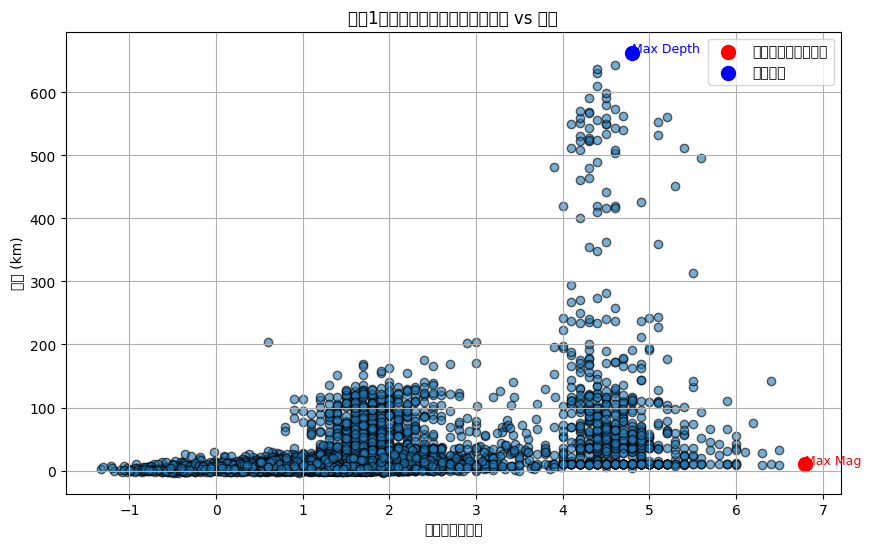

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
df = pd.read_csv(url)

# x: マグニチュード、y: 深さ
x = df["mag"]
y = df["depth"]

plt.figure(figsize=(10,6))
plt.scatter(x, y, alpha=0.6, edgecolor='k')
plt.xlabel("マグニチュード")
plt.ylabel("深さ (km)")
plt.title("過去1か月の地震：マグニチュード vs 深さ")
plt.grid(True)

# 最大マグニチュード
max_mag_eq = df.loc[df["mag"].idxmax()]
plt.scatter(max_mag_eq["mag"], max_mag_eq["depth"], color='red', s=100, label='最大マグニチュード')
plt.text(max_mag_eq["mag"], max_mag_eq["depth"], "Max Mag", fontsize=9, color='red')

# 最も深い地震
max_depth_eq = df.loc[df["depth"].idxmax()]
plt.scatter(max_depth_eq["mag"], max_depth_eq["depth"], color='blue', s=100, label='最深地震')
plt.text(max_depth_eq["mag"], max_depth_eq["depth"], "Max Depth", fontsize=9, color='blue')

plt.legend()
plt.show()


**チャレンジ6（上級）: 地震のグローバルマップ作成**

- foliumまたはmatplotlibなどのマッピングライブラリを使用して、すべての地震を地図上にプロットしてください。
- 以下の特徴を追加してください：
    - 地震の位置をポイントで表示。
    - マグニチュードに基づいてポイントを色分け（例：<4.0は緑、4.0–6.0は黄色、>6.0は赤）。
    - ポイントにマウスを重ねると、地震の位置、マグニチュード、日本日付、深さを表示するツールチップを追加。

In [3]:
import pandas as pd
import folium
from datetime import datetime, timedelta

# データ読み込み
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
df = pd.read_csv(url)

# 日本時間に変換
df["time_dt"] = pd.to_datetime(df["time"], format="%Y-%m-%dT%H:%M:%S.%fZ")
df["time_jst"] = df["time_dt"] + timedelta(hours=9)

# 地図の初期設定（中心を世界中央に）
m = folium.Map(location=[20, 0], zoom_start=2)

# マグニチュードに応じた色分け関数
def mag_color(mag):
    if mag < 4.0:
        return "green"
    elif 4.0 <= mag <= 6.0:
        return "orange"
    else:
        return "red"

# 全ての地震をプロット
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=3 + row["mag"],  # マグニチュードに応じてサイズ変更
        color=mag_color(row["mag"]),
        fill=True,
        fill_color=mag_color(row["mag"]),
        fill_opacity=0.7,
        tooltip=(
            f"場所: {row['place']}<br>"
            f"マグニチュード: {row['mag']}<br>"
            f"深さ: {row['depth']} km<br>"
            f"日時(JST): {row['time_jst'].strftime('%Y-%m-%d %H:%M:%S')}"
        )
    ).add_to(m)

# 地図を表示または保存
m.save("earthquake photo.ipynb")
print("地図を 'earthquake photo.ipynb' に保存しました。")


地図を 'earthquake photo.ipynb' に保存しました。


# 課題提出

### Theme: Impact Visualization Challenge
USGSのライブ地震データを使って、**Impact** を感じる可視化や分析を作ってください。  
自分で考えて、探して、形にしてください。説明や手順はありません。

---

### How to Begin
1. **VS Code** を開く  
2. 自分の **GitHub「me」リポジトリ** の中に **新しいフォルダ** を作成 → 名前は **Week6**  
3. その中に **earthquake.ipynb** というファイルを作る  
4. **Markdown cell** を追加して、タイトルと自分の作品の説明を書く  
5. **Code cell** を追加し、ライブラリと **USGS データ** をインポートする（授業で使ったコードをコピー）  
6. さらに自分の **code cells** を追加して、可視化や分析を完成させる  

---

### 提出内容
- **Jupyter Notebook (.ipynb)**（code cells と markdown cells を含む）  
- **図または地図**（image または HTML）  
- **日本語サマリー（200〜400字）**：やったこと・わかったこと・感じたこと  

---

### 提出方法
成果物を **GitHub** にコミットし、`.ipynb` への **direct link** を **UNIPA** に提出。  
ファイルのアップロードは禁止。

---

### 評価
- **9–10：素晴らしい**  
- **7–8：ま〜ま〜**  
- **6：ギリOK**  
- **0：未提出**